In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

Question 2.

In this question we will be merging two images in different ways. Write all the functions for grayscale images only.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale


In [3]:
def merge1(img1, img2):
  '''
  write a program to merge two image such that left half of the output image consists of left half of image 1 and right half of the output image
  consists of right half of image 2. For example ther are two images of 512 x 512 pixel then the output image will have 0 to 255 columns of the first image
  and 256 to 511 columns of the second image

  Inputs:
  - img1 - first image
  - img2 - second image

  Outputs: 
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
    
  h,w=img1.shape[:2]
  if(img1.ndim == 2):
    out_img = np.zeros((h,w), dtype=np.uint8)
  else:
    out_img = np.zeros((h,w,3), dtype=np.uint8)
    
  for i in range (w):
    for j in range(h):
        if(i<w/2):
           out_img[j,i]=img1[j,i]
        else:
           out_img[j,i]=img2[j,i] 
    
  #############################
  # End your code here ########
  #############################    
    
  return np.uint8(out_img)

In [4]:
def resize_arbitary(img, out_pixels):
  '''
  write a program which resizes the given image into the given pixels

  Inputs:
  - img - original image
  - out_pixels - 2x1 array having out image width and height respectively

  Outputs:
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use cv2.resize or any other externa module.
  '''

  #############################
  # Start your code from here #
  #############################
    
  orig_h,orig_w= img.shape[:2]
    
  scale_w=(out_pixels[0][0]/orig_w)
  scale_h=(out_pixels[1][0]/orig_h)
    
  if(img.ndim == 2):
    out_img = np.zeros((out_pixels[1][0],out_pixels[0][0]), dtype=np.uint8)
  else:
    out_img = np.zeros((out_pixels[1][0],out_pixels[0][0],3), dtype=np.uint8)
    
  
    
  for i in range(out_pixels[1][0]):
    for j in range(out_pixels[0][0]):
        out_img[i,j]=img[int(i/scale_h),int(j/scale_w)]
    
    
  #############################
  # End your code here ########
  #############################    
    
  return np.uint8(out_img)

In [5]:
def merge2(img1, img2):
  '''
  Using the above function change the size of both images such that the height remains the same and the width is halved for example an 512x512  image 
  should result in an image of size 512x256.
  Then write a program to merge two images such that left half consists of the scaled first image and right half consists of the scaled second image.
  Inputs:
  - img1 - first image
  - img2 - second image

  Outputs: 
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
    
  h1,w1=img1.shape[:2]
  h2,w2=img2.shape[:2]
  if(img1.ndim == 2):
    out_img = np.zeros((h1,w1), dtype=np.uint8)
  else:
    out_img = np.zeros((h1,w1,3), dtype=np.uint8)  
    
  w1_half=int(w1/2)
  w2_half=int(w2/2)
  scaled_img1=resize_arbitary(img1, [[w1_half],[h1]])
  scaled_img2=resize_arbitary(img2, [[w2_half],[h2]])
  
  for i in range (h1):
    for j in range(w1_half):
           out_img[i,j]=scaled_img1[i,j]
            
  for i in range (h1):
    for j in range(w2_half):
           out_img[i,j+w1_half]=scaled_img2[i,j]
       
    
  #############################
  # End your code here ########
  #############################    
    
  return np.uint8(out_img)

In [6]:
def merge_pip(img1, img2):
  '''
  By using the resize_arbitary function resize the second image by half such that the output width and height is half of the input width and height.
  Then write a program to merge the two images as picture in picture (PiP). the center of the two images should be alligned to each other

  Inputs:
  - img1 - first image
  - img2 - second image

  Outputs: 
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
    
  h1,w1=img1.shape[:2]
  h2,w2=img2.shape[:2]
  if(img1.ndim == 2):
    out_img = np.zeros((h1,w1), dtype=np.uint8)
  else:
    out_img = np.zeros((h1,w1,3), dtype=np.uint8)
  w2_new=int(w2/2)
  h2_new=int(h2/2)
  scaled_img2=resize_arbitary(img2, [[w2_new],[h2_new]])
  for i in range(h1):
        for j in range(w1):
            out_img[i,j]=img1[i,j]
  w_minus=int((w1/2)-(w2_new/2))
  w_add=int((w1/2)+(w2_new/2))
  h_minus=int((h1/2)-(h2_new/2))
  h_add=int((h1/2)+(h2_new/2))
  for i in range(h_minus,h_add,1):
    for j in range (w_minus,w_add,1):
 
        out_img[i,j]=scaled_img2[i-h_minus,j-w_minus]
           
    
  #############################
  # End your code here ########
  #############################    
    
  return np.uint8(out_img)

In [7]:
def merge_blend(img1, img2):
  '''
  In this function we will blend two images. First resize the second image to half of its original width and height. Then write a program to blend the
  two images. Blending is nothing but adding the corosponding pixel values of the two images. Keep the center of the two images aligned just like the above
  function.

  Inputs:
  - img1 - first image
  - img2 - second image

  Outputs: 
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
    
  h1_m,w1_m=img1.shape[:2]
  h2_m,w2_m=img2.shape[:2]
  if(img1.ndim == 2):
    out_img = np.zeros((h1_m,w1_m), dtype=np.uint8)
  else:
    out_img = np.zeros((h1_m,w1_m,3), dtype=np.uint8)
  w2_new_b=int(w2_m/2)
  h2_new_b=int(h2_m/2)
  scaled_img2_m=resize_arbitary(img2, [[w2_new_b],[h2_new_b]]) 
  for i in range(h1_m):
        for j in range(w1_m):
            out_img[i,j]=img1[i,j]
  w_minus_b=int((w1_m/2)-(w2_new_b/2))
  w_add_b=int((w1_m/2)+(w2_new_b/2))
  h_minus_b=int((h1_m/2)-(h2_new_b/2))
  h_add_b=int((h1_m/2)+(h2_new_b/2))
  for i in range(h_minus_b,h_add_b,1):
    for j in range (w_minus_b,w_add_b,1):

        out_img[i,j] = 0.5*scaled_img2_m[i-h_minus_b,j-w_minus_b] + 0.5*img1[i,j]
  #############################
  # End your code here ########
  #############################    
    
  return np.uint8(out_img)

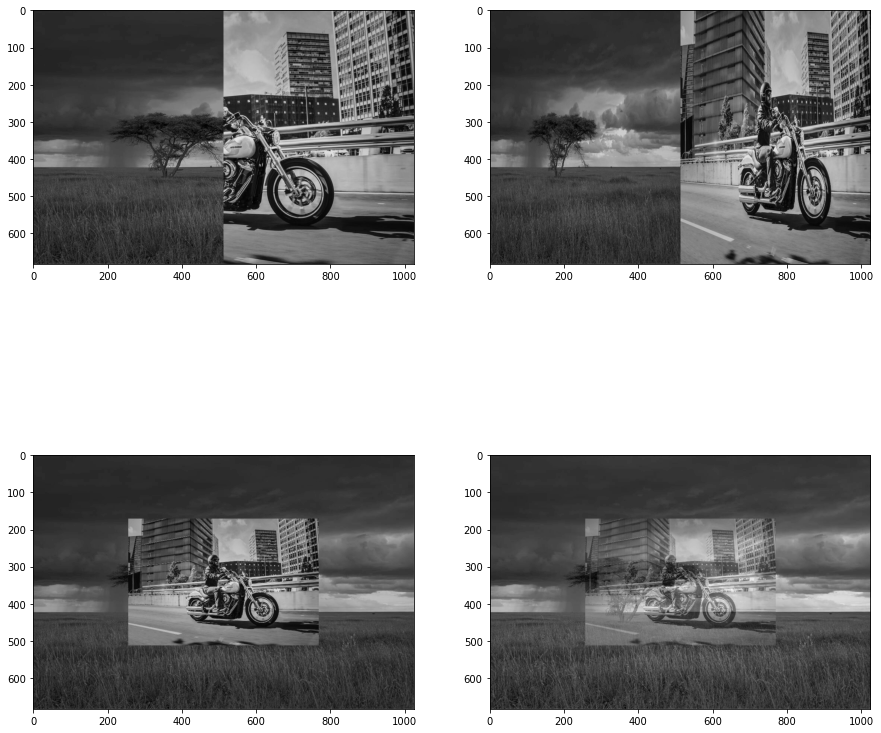

In [8]:
im1 = merge1(img1_gray, img2_gray)
im2 = merge2(img1_gray, img2_gray)
im3 = merge_pip(img1_gray, img2_gray)
im4 = merge_blend(img1_gray, img2_gray)

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(im1, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(im2, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(im3, cmap="gray")
plt.subplot(2, 2, 4)
plt.imshow(im4, cmap="gray")
